In [2]:
#importing numpy
import numpy as np
import math

# importing matplotlib to perform figures
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [7]:

list_x=[]
list_y=[]

file = open('density_x_dim_tails_cg.dat', "r")

for line in file.readlines():

    line_values = line.split()
    values = [float(x) for x in line_values]
    list_x.append(values[0])

file = open('density_y_dim_tails_cg.dat', "r")

for line in file.readlines():

    line_values = line.split()
    values = [float(x) for x in line_values]
    list_y.append(values[0])   
    


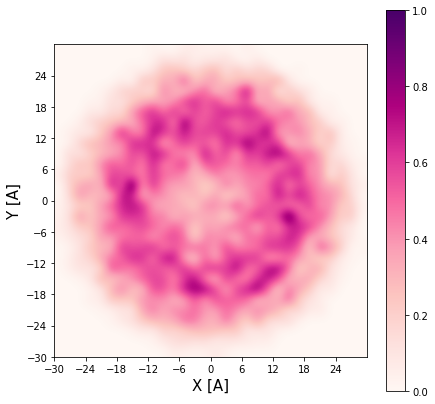

In [11]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

xmin = min(list_x)
xmax = max(list_x)
ymin = min(list_y)
ymax = max(list_y)

center_x= sum(list_x) / float(len(list_x))
center_y= sum(list_y) / float(len(list_y))

list_x[:] = [x - center_x for x in list_x]
list_y[:] = [y - center_y for y in list_y]


xmin = -30
xmax = 30
ymin = -30
ymax = 30

bin_num=30

# label matplotlib axes	
plt.xlabel('X [A]', size=15)
plt.ylabel('Y [A]', size=15)
ticks_x = int((xmax-xmin)/10)
ticks_y = int((ymax-ymin)/10)

# definition of axes for the graph
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_xticks(np.arange(xmin,xmax,ticks_x))
ax.set_yticks(np.arange(ymin,ymax,ticks_y))
ax.set_aspect('equal')


array_op,xedges,yedges = np.histogram2d(list_x,list_y, bins=bin_num,range=[[xmin,xmax],[ymin,ymax]])

max_array=max(array_op.flatten())
array_avg = array_op/max_array
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1] ]
# interesting interpolation: bicubic, lanczos see http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
cax= ax.imshow(array_avg.T,extent=extent,interpolation='bicubic',origin='lower',cmap='RdPu')
plt.colorbar(cax)
#ax.plot(list_x,list_y,'o',markerfacecolor='#FC3147',markeredgecolor='#FC3147',markersize=0.8,alpha=0.8)

fig.savefig("density_DIM.svg", dpi=200)